<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
# !wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head(7)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(7)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to understand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

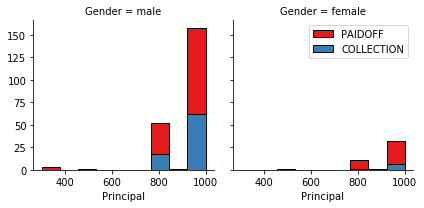

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

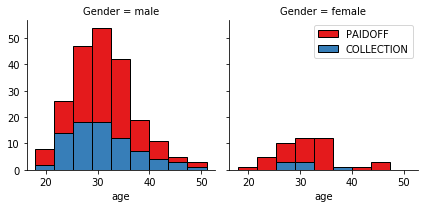

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

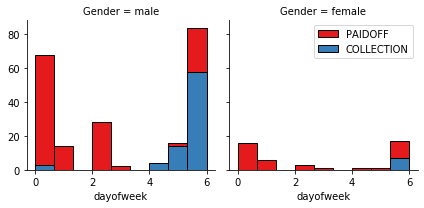

In [11]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0, 1], inplace=True)
df.head(7)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,0,4,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head(7)

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college
5,1000,30,36,0,college
6,1000,30,28,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.head(7)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1
5,1000,30,36,0,1,0,0,0,1
6,1000,30,28,0,1,0,0,0,1


In [18]:
# How many in category "Master or above"?
Feature['Master or Above'].value_counts() # only 2

0    344
1      2
Name: Master or Above, dtype: int64

In [19]:
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head(7)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
5,1000,30,36,0,1,0,0,1
6,1000,30,28,0,1,0,0,1


### Feature selection

Let's define a feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [21]:
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

What are our labels?

In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.  
You should use the following algorithm:
1. K Nearest Neighbor(KNN)
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression



__Notice__: 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

## 1 - K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**Warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and val to find the best __k__.

In [24]:
# custom module implementing all functionalites I needed (cleaner approach)
# available in capstone/support.py (local)
import capstone.support as cp

In [25]:
# 1st iteration
from sklearn.model_selection import train_test_split

def display_shape(tset, vset, lab='X'):
  print(lab + "_train shape: ", tset.shape, " / ", lab + "_val shape: ", vset.shape)
  return
  
# because normalization should be performed after split train/val - let's redo it.
X = Feature
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666)

# normalize - using helper functions from module cp
X_train, mu, sigma = cp.feature_normalize(X_train) # preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_val = cp.feature_normalize_mu_sigma(X_val, mu, sigma) # use calc. mu and sigma

display_shape(X_train, X_val)
display_shape(y_train, y_val, 'y')

X_train shape:  (276, 8)  /  X_val shape:  (70, 8)
y_train shape:  (276,)  /  y_val shape:  (70,)


The best accuracy was: 0.8  with k= 5


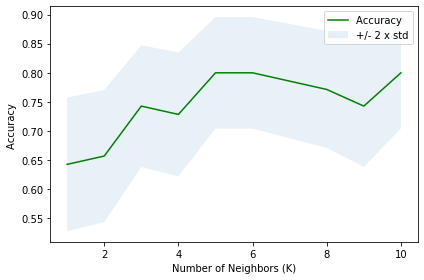

In [26]:
# using helper functions
best_k, mean_acc, std_acc = cp.find_best_k(X_train, y_train, X_val, y_val)
cp.plot_for_best_k(mean_acc, std_acc)

In [27]:
# once we have best k, we re-train our model on full initial normalized train set (X)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

print("best k: ", best_k)

X = Feature
X, mu, sigma = cp.feature_normalize(X)

knn = KNeighborsClassifier(n_neighbors = best_k).fit(X, y)
print("Train set KNN Accuracy: {0:1.5f}".format(metrics.accuracy_score(y, knn.predict(X))))

best k:  5
Train set KNN Accuracy: 0.81503


### Alt  - K Nearest Neighbor(KNN) best model with cross-validation

In [28]:
X = Feature # do not normalize here (do it within the cross-validation method)

best_k_cv, _mean_acc_cv = cp.find_best_k_cv(X, y)

The best accuracy was: 0.71110 with k = 7


In [29]:
# again with best k,re-train our model on full initial normalized train set (X)
X = Feature
X, mu, sigma = cp.feature_normalize(X)

knn_cv = KNeighborsClassifier(n_neighbors = best_k_cv).fit(X, y)
print("Train set KNN_cv  Accuracy: {0:1.5f}".format(metrics.accuracy_score(y, knn_cv.predict(X))))

Train set KNN_cv  Accuracy: 0.80925


## 2 - Decision Tree

In [30]:
# Reset
from sklearn.tree import DecisionTreeClassifier

X = Feature
# y unchanged

# No split, use whole train set as a train set.
## X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666)
y_train = y

# normalize - using helper functions from module cp
X_train, mu, sigma = cp.feature_normalize(X) # X_train
# X_val = cp.feature_normalize_mu_sigma(X_val, mu, sigma)

print("X_train shape: ", X_train.shape, " X shape: ", X.shape, " y_train.shape: ", y_train.shape)

X_train shape:  (346, 8)  X shape:  (346, 8)  y_train.shape:  (346,)


In [31]:
# Train
dt = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_split=5) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
# Predict
y_dt_pred = dt.predict(X_train) # X_val 
print("Train set dt's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_train, y_dt_pred))) # 0.71429

Train set dt's Accuracy: 0.79480


#### Alt - dt

In [33]:
dt7g = DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_split=5)

dt7g.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
# Predict
y_dt7g_pred = dt7g.predict(X_train)

print("Train set dt7g's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_train, y_dt7g_pred)))

Train set dt7g's Accuracy: 0.79480


## 3 -  Support Vector Machine

In [35]:
# Reset
from sklearn import svm

X = Feature
X_train, _mu, _sigma = cp.feature_normalize(X)
y_train = y

In [36]:
# Train
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
# Predict
y_svm_rbf_pred = svm_rbf.predict(X_val)
print("Validation set svn_rbf's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_val, y_svm_rbf_pred)))

Validation set svn_rbf's Accuracy: 0.77143


#### Alt - SVM with polynomial kernel

In [38]:
svm_poly3 = svm.SVC(kernel='poly', degree=3)
# degrees 4,5,6,7 do not generalize as well as poly of degree 3.

svm_poly3.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_svm_poly3_pred = svm_poly3.predict(X_val)

print("Validation set svn_poly3's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_val, y_svm_poly3_pred)))

Validation set svn_poly3's Accuracy: 0.77143


#### Alt - SVM with sigmoid kernel

In [40]:
svm_sig = svm.SVC(kernel='sigmoid', gamma='auto')

svm_sig.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_svm_sig_pred = svm_sig.predict(X_val)

print("Validation set svn_sig's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_val, y_svm_sig_pred)))

Validation set svn_sig's Accuracy: 0.71429


#### Alt - SVM with linear kernel

In [42]:
svm_lin = svm.SVC(kernel='linear')

svm_lin.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
y_svm_lin_pred = svm_lin.predict(X_val)

print("Validation set svn_lin's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_val, y_svm_lin_pred)))

Validation set svn_lin's Accuracy: 0.77143


## 4  - Logistic Regression

In [44]:
# Reset
from sklearn.linear_model import LogisticRegression

X = Feature
X_train, _mu, _sigma = cp.feature_normalize(X)
y_train = y

In [45]:
# Train
# logistic regression with regularization => will generalize better (then unfair cmp with other methods...)

lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

In [46]:
# Predict
y_lr_pred = lr.predict(X_train)

print("Train set lr's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_train, y_lr_pred)))

Train set lr's Accuracy: 0.74855


#### Alt - other LR

In [47]:
lr2 = LogisticRegression(C=0.1, solver='newton-cg', penalty='l2').fit(X_train, y_train)

In [48]:
y_lr2_pred = lr2.predict(X_train)

print("Train set lr2's Accuracy: {0:1.5f}".format(metrics.accuracy_score(y_train, y_lr2_pred)))

Train set lr2's Accuracy: 0.75145


# Model Evaluation using Test set

In [49]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [50]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [51]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [52]:
## Prep test set
X = Feature
_, mu, sigma = cp.feature_normalize(X)
X_test, y_test = cp.prep_test_set(test_df, mu, sigma) # mu, sigma as defined on training set X

print("X_test shape: ", X_test.shape, " / y_test shape: ", y_test.shape)

X_test shape:  (54, 8)  / y_test shape:  (54,)


In [53]:
## knn predictions on test set
y_hat_knn_pred = knn.predict(X_test)

knn_j_s_sc, knn_f1_sc = cp.scores_fn(y_test, y_hat_knn_pred)
data = cp.add_data('knn', knn_j_s_sc, knn_f1_sc, ll_sc='NA')

In [54]:
## knn_cv predictions on test set
y_hat_knn_cv_pred = knn_cv.predict(X_test)

knn_cv_j_sc, knn_cv_f1_sc = cp.scores_fn(y_test, y_hat_knn_cv_pred)
data = cp.add_data('knn_cv', knn_cv_j_sc, knn_cv_f1_sc, ll_sc='NA', data=data)

In [55]:
## dt predictions on test set
y_hat_dt_pred = dt.predict(X_test)
y_hat_dt7g_pred = dt7g.predict(X_test)

dt_j_sc, dt_f1_sc = cp.scores_fn(y_test, y_hat_dt_pred)
dt7g_j_sc, dt7g_f1_sc = cp.scores_fn(y_test, y_hat_dt7g_pred)

data = cp.add_data('dt',   dt_j_sc, dt_f1_sc, ll_sc='NA', data=data)
data = cp.add_data('dt7g', dt7g_j_sc, dt7g_f1_sc, ll_sc='NA', data=data)

In [56]:
## svm(rbf) predictions on test set
y_hat_svm_rbf = svm_rbf.predict(X_test)

svm_rbf_j_sc, svm_rbf_f1_sc = cp.scores_fn(y_test, y_hat_svm_rbf)
data = cp.add_data('svm (rbf)', svm_rbf_j_sc, svm_rbf_f1_sc, ll_sc='NA', data=data)

In [57]:
## svm(poly), svm(sigmoid), svm(linear) predictions on test set
y_hat_svm_poly3 = svm_poly3.predict(X_test)
y_hat_svm_sig = svm_sig.predict(X_test)
y_hat_svm_lin = svm_lin.predict(X_test)

svm_poly3_j_sc, svm_poly3_f1_sc = cp.scores_fn(y_test, y_hat_svm_poly3)
svm_sig_j_sc, svm_sig_f1_sc = cp.scores_fn(y_test, y_hat_svm_sig)
svm_lin_j_sc, svm_lin_f1_sc = cp.scores_fn(y_test, y_hat_svm_lin)

data = cp.add_data('svm (poly3)', svm_poly3_j_sc, svm_poly3_f1_sc, ll_sc='NA', data=data)
data = cp.add_data('svm (sigmoid)', svm_sig_j_sc, svm_sig_f1_sc, ll_sc='NA', data=data)
data = cp.add_data('svm (linear)', svm_lin_j_sc, svm_lin_f1_sc, ll_sc='NA', data=data)

In [58]:
## Logistic Regression
y_hat_lr = lr.predict(X_test)
y_hat_lr2 = lr2.predict(X_test)

y_hat_lr_prob = lr.predict_proba(X_test)
y_hat_lr2_prob = lr2.predict_proba(X_test)


lr_j_sc, lr_f1_sc, lr_ll_sc = cp.scores_fn_ll(y_test, y_hat_lr, y_hat_lr_prob)
lr2_j_sc, lr2_f1_sc, lr2_ll_sc = cp.scores_fn_ll(y_test, y_hat_lr2, y_hat_lr2_prob)

data = cp.add_data('logistic_regr', lr_j_sc, lr_f1_sc, ll_sc=lr_ll_sc, data=data)
data = cp.add_data('logistic_regr2', lr2_j_sc, lr2_f1_sc, ll_sc=lr2_ll_sc, data=data)

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [59]:
df_data = pd.DataFrame(data=data)
df_data

,Algorithm,Jaccard,F1-score,LogLoss
0,knn,0.700000,0.823529,NA
1,knn_cv,0.711538,0.831461,NA
2,dt,0.720000,0.837209,NA
3,dt7g,0.750000,0.857143,NA
4,svm (rbf),0.722222,0.838710,NA
5,svm (poly3),0.730769,0.844444,NA
6,svm (sigmoid),0.660377,0.795455,NA
7,svm (linear),0.740741,0.851064,NA
8,logistic_regr,0.754717,0.860215,0.556359
9,logistic_regr2,0.740741,0.851064,0.477153


Thus based on these results (metrics: f1 score or jaccard similarity score), logistic regression (logistic_regr, entry number 8 in the above table) is our best predictor, the one that generalizes better.

Please note that in the case of logisitic regression we are using regularization, this helps prevent overfitting and leads to better generalization.

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>